# Medidas de posição ou localização


Muitas vezes queremos resumir os dados, apresentando um ou alguns valores que sejam representativos da série toda. Usualmente, emprega-se uma das seguintes medidas de posição (ou de localizaçaõ) central:

- *Média*: boas propriedades estatísticas. (média aritmética, média geométrica, média harmônica, etc).
- *Mediana*: medida resistente a dados atípicos.
- *Moda*: valor mais frequente.
- *Quantis*: caracterização da distribuição dos dados.

## Dados

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [15]:
df = pd.read_csv('../data/dados_banco.csv', sep=',')
df.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
1,52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
2,8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
3,54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
4,45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1


## Média

Em geral, não é possível calcular a média populacional de uma variável, $\mu$. Usa-se então um estimador, por exemplo a média
amostral, ou seja, a média que será obtida de uma amostra (representativa) da população (estimativa). Vamos estabelecer que $X_{1}, ..., X_{n}$ é uma amostra aleatória e $x_{1}, ..., x_{n}$ os dados observados dessa amostra. As medidas aqui apresentadas são amostrais e são obtidas a partir de $x_{1}, ..., x_{n}$.

A média aritmética é definida como:

$$\bar{x} = \frac{\sum \limits _{i=1} ^{n} x_{i}}{n}$$

**Vantagens da média**

- Fácil interpretação: A média é intuitiva e fácil de interpretar e calcular.
- Utilidade em cálculos subsequentes: A média é uma medida que pode ser usada em cálculos posteriores, como desvios em relação à média, cálculo de variância e desvio padrão. Ela serve como base para várias outras medidas estatísticas.

**Desvantagens da média**
- Sensibilidade a valores extremos: A média pode ser influenciada por valores extremos (outliers) em um conjunto de dados. Se houver valores discrepantes, eles podem distorcer significativamente a média, tornando-a menos representativa do conjunto de dados como um todo.
- Não é adequada para distribuições assimétricas: Em distribuições assimétricas, como distribuições com caudas longas, a média pode não ser uma medida representativa da localização central dos dados. A mediana, que representa o valor do meio quando os dados são ordenados, pode ser mais apropriada nessas situações.
- Dependência da escala: A média é sensível à escala dos dados. Se os dados estiverem em diferentes escalas ou unidades de medida, a média pode ser distorcida. É importante considerar a escala dos dados e o contexto antes de interpretar a média.

In [38]:
X = 'Idade'

In [39]:
df[X].mean()

31.8019

In [40]:
df.groupby('Empresa')[X].mean()

Empresa
Autônomo    29.163787
Privada     32.867115
Pública     30.706531
Name: Idade, dtype: float64

## Mediana

Considere agora os dados ordenados $x_{(1)}, ..., x_{(n)}$, isto é, $$x_{(1)} = min(x_{1}, ..., x_{n})$$ $$x_{(n)} = max(x_{1}, ..., x_{n})$$ **Qual é a posição central dos dados?**

Se $n$ é ímpar, a posição central é $c = \frac{(n + 1)}{2}$.

Se $n$ é par, as posições centrais são $c = \frac{n}{2}$ e $c + 1 = \frac{n}{2} + 1$.

A **mediana** é definida como:
$$
    \tilde{x}= 
\begin{cases}
    x_{(c)},                    & \text{se } n \text{ é ímpar} \\
    \frac{x_{(c)} + x_{(c+1)}}{2}, & \text{se } n \text{ é par}
\end{cases}
$$

**Vantagens da mediana**
- Resistência a valores extremos: A mediana é menos sensível a valores extremos em comparação com a média. Ela é calculada identificando o valor do meio dos dados ordenados, o que significa que valores discrepantes têm um impacto limitado na sua estimativa. Isso faz com que a mediana seja uma medida mais robusta em situações em que existem outliers ou dados assimétricos.

- Adequada para distribuições assimétricas: A mediana é particularmente útil em distribuições assimétricas, onde a média pode ser influenciada pela assimetria. Ela representa o valor central que divide a distribuição em duas partes iguais, sendo assim uma medida que reflete melhor a localização central dos dados em distribuições assimétricas.

- Aplicável a dados categóricos ordinais: Ao contrário da média, a mediana pode ser calculada para variáveis categóricas ordinais. Ela pode ser usada para identificar o valor central em uma escala ordinal, onde há uma ordem natural entre as categorias.

**Desvantagens da mediana**

- Perda de informações: A mediana é uma medida de tendência central que apenas considera o valor do meio dos dados ordenados. Isso implica em uma perda de informação sobre a distribuição dos valores ao redor do ponto central. Em alguns casos, isso pode ser indesejado, especialmente quando se deseja uma visão mais completa da distribuição dos dados.

- Dificuldade de cálculo: Ao contrário da média, que pode ser calculada diretamente usando a fórmula adequada, a mediana requer que os dados sejam ordenados antes do cálculo. Isso pode ser um processo mais demorado e complexo, especialmente em grandes conjuntos de dados.

- Menor interpretabilidade: Embora a mediana possa ser facilmente compreendida, a sua interpretação pode ser um pouco menos intuitiva do que a média. Enquanto a média representa um valor médio, a mediana representa o valor do meio. Em certos contextos, pode ser necessário explicar o conceito de ordenação dos dados para uma melhor compreensão da mediana.

In [41]:
df[X].median()

32.0

In [42]:
df.groupby('Empresa')[X].median()

Empresa
Autônomo    29.0
Privada     33.0
Pública     31.0
Name: Idade, dtype: float64

## Moda

A moda $Mo$ é o valor mais frequente da amostra. Uma amostra pode ter uma moda, mais de uma moda, ou a moda pode não existir. Exemplos:
- `[1, 2, 2, 3, 4]`. $Mo = $ `[2]`
- `[1, 2, 2, 3, 3, 4]`. $Mo = $ `[2, 3]`
- `[1, 2, 3, 4]`. $Mo = $ Não existe

In [43]:
stats.mode(df[X])

ModeResult(mode=32, count=1343)

In [44]:
df.groupby('Empresa')[X].apply(stats.mode)

Empresa
Autônomo    (29, 197)
Privada     (33, 976)
Pública     (31, 507)
Name: Idade, dtype: object

## Quantis

Um quantil é o valor que provoca uma divisão conveniente nos
valores ordenados.
- O quantil de 10%, $q_{10}$, divide os dados de tal forma que 10% dos menores valores sejam menores que ele.
- O quantil de 50%, $q_{50}$ é a mediana.
- Os quartis $Q_{1}$, $Q_{2}$ e $Q_{3}$ dividem os dados em porções de 25%.
- Os decis dividem os dados em porções de 10%, $d_{\alpha}$.
- Os percentis dividem os dados em porções de 1%, $p_{\alpha}$.

In [45]:
df[X].describe()

count    10000.000000
mean        31.801900
std          2.931913
min         21.000000
25%         30.000000
50%         32.000000
75%         34.000000
max         50.000000
Name: Idade, dtype: float64

In [46]:
mean = df[X].mean()
median = df[X].median()
mode = stats.mode(df[X])[0]

## Observações
- A média aritmética pode ser calculada a partir dos dados brutos, sem recorrer a qualquer agrupamento ou ordenação dos valores originais, o que não ocorre com a mediana e a moda.
- A mediana é preferível à média quando se está interessado em conhecer exatamente o ponto médio da distribuição, aquele valor que divide os dados em duas partes iguais.
- A moda é utilizada essencialmente quando pretendemos apenas uma medida rápida e aproximada da tendência central.

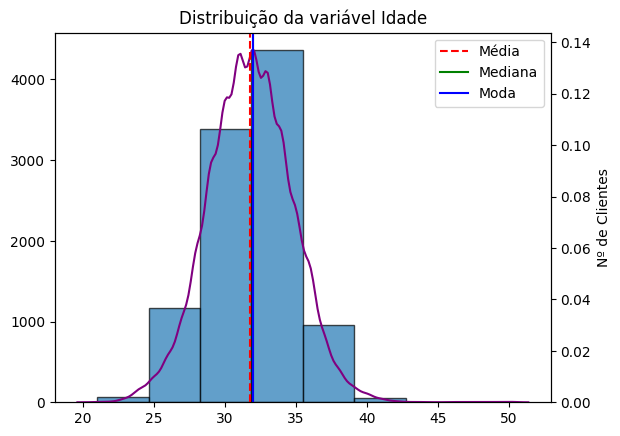

In [47]:
fig, ax1 = plt.subplots()
ax1.hist(df[X], bins=8, edgecolor='black', alpha=0.7)

ax2 = ax1.twinx()
sns.kdeplot(df[X], color='purple')
ax2.axvline(mean, color='red', linestyle='--', label='Média')
ax2.axvline(median, color='green', linestyle='-', label='Mediana')
ax2.axvline(mode, color='blue', linestyle='-', label='Moda')

plt.legend()
plt.title(f"Distribuição da variável {X}")
plt.xlabel(X)
plt.ylabel("Nº de Clientes")
plt.show()